In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (10,5)
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import Assignment as a

# import preprocessed data locally
data = pd.read_csv("ripa_preprocessed.csv", low_memory=False)
K = 3
MAX_ITER = 2000

In [33]:
data.head()

,stop_id,beat,isschool,date_stop,time_stop,stopduration,stop_in_response_to_cfs,officer_assignment_key,exp_years,pid,...,assignment_F,assignment_G,assignment_H,assignment_I,assignment_J,timestamp,year,month,day,weekday
0,2443,122,0,2018-07-01,00:01:37,30,0,1,10,1,...,0.0,0.0,0.0,0.0,0.0,2018-07-01 00:01:37,2018,7,1,6
1,2444,121,0,2018-07-01,00:03:34,10,0,1,18,1,...,0.0,0.0,0.0,0.0,0.0,2018-07-01 00:03:34,2018,7,1,6
2,2447,822,0,2018-07-01,00:05:43,15,1,10,1,1,...,0.0,0.0,0.0,0.0,1.0,2018-07-01 00:05:43,2018,7,1,6
3,2447,822,0,2018-07-01,00:05:43,15,1,10,1,2,...,0.0,0.0,0.0,0.0,1.0,2018-07-01 00:05:43,2018,7,1,6
4,2448,614,0,2018-07-01,00:19:06,5,0,1,3,1,...,0.0,0.0,0.0,0.0,0.0,2018-07-01 00:19:06,2018,7,1,6


In [34]:
# get only numerical and relevant data for analysis
data = data.drop(['date_stop', 'time_stop', 'timestamp', 'stop_id', 'pid'], axis=1)

In [35]:
# data before normalizing
data.head()

,beat,isschool,stopduration,stop_in_response_to_cfs,officer_assignment_key,exp_years,isstudent,perceived_limited_english,perceived_age,gender_female,...,assignment_E,assignment_F,assignment_G,assignment_H,assignment_I,assignment_J,year,month,day,weekday
0,122,0,30,0,1,10,0,0,25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,7,1,6
1,121,0,10,0,1,18,0,0,25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,7,1,6
2,822,0,15,1,10,1,0,0,30,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2018,7,1,6
3,822,0,15,1,10,1,0,0,30,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2018,7,1,6
4,614,0,5,0,1,3,0,0,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,7,1,6


In [37]:
data = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns)

In [38]:
# data after normalizing
data.head()

,beat,isschool,stopduration,stop_in_response_to_cfs,officer_assignment_key,exp_years,isstudent,perceived_limited_english,perceived_age,gender_female,...,assignment_E,assignment_F,assignment_G,assignment_H,assignment_I,assignment_J,year,month,day,weekday
0,0.012387,0.0,0.020153,0.0,0.0,0.183673,0.0,0.0,0.201681,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.0,1.0
1,0.011261,0.0,0.006254,0.0,0.0,0.346939,0.0,0.0,0.201681,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.0,1.0
2,0.800676,0.0,0.009729,1.0,1.0,0.000000,0.0,0.0,0.243697,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.545455,0.0,1.0
3,0.800676,0.0,0.009729,1.0,1.0,0.000000,0.0,0.0,0.243697,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.545455,0.0,1.0
4,0.566441,0.0,0.002780,0.0,0.0,0.040816,0.0,0.0,0.184874,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545455,0.0,1.0


In [39]:
%%time
results = a.AssignmentFunction(np.array((data.exp_years, data.officer_assignment_key)).T, K, MAX_ITER)

Fitting Kmeans
iter:  0
iter:  1
iter:  2
iter:  3
iter:  4
iter:  5
iter:  6
iter:  7
iter:  8
iter:  9
Converged!
Fitting MOG
Fitting Birch
CPU times: user 2min 5s, sys: 648 ms, total: 2min 5s
Wall time: 2min 1s


/Users/kevinnguyen/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_birch.py:647: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (3). Decrease the threshold.
  warnings.warn(


In [9]:
%%time
# reduced_data = TSNE(n_components=2, verbose=2).fit_transform(data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 464044 samples in 0.009s...
[t-SNE] Computed neighbors for 464044 samples in 4297.182s...
[t-SNE] Computed conditional probabilities for sample 1000 / 464044
[t-SNE] Computed conditional probabilities for sample 2000 / 464044
[t-SNE] Computed conditional probabilities for sample 3000 / 464044
[t-SNE] Computed conditional probabilities for sample 4000 / 464044
[t-SNE] Computed conditional probabilities for sample 5000 / 464044
[t-SNE] Computed conditional probabilities for sample 6000 / 464044
[t-SNE] Computed conditional probabilities for sample 7000 / 464044
[t-SNE] Computed conditional probabilities for sample 8000 / 464044
[t-SNE] Computed conditional probabilities for sample 9000 / 464044
[t-SNE] Computed conditional probabilities for sample 10000 / 464044
[t-SNE] Computed conditional probabilities for sample 11000 / 464044
[t-SNE] Computed conditional probabilities for sample 12000 / 464044
[t-SNE] Computed conditional prob

In [10]:
tsneResults = KMeans(n_clusters=3, max_iter=MAX_ITER, verbose=2).fit_predict(reduced_data)

Initialization complete
Iteration 0, inertia 158511152.0
Iteration 1, inertia 111438928.0
Iteration 2, inertia 101956560.0
Iteration 3, inertia 99506464.0
Iteration 4, inertia 98861192.0
Iteration 5, inertia 98709528.0
Iteration 6, inertia 98672896.0
Iteration 7, inertia 98661240.0
Converged at iteration 7: center shift 0.02078702300786972 within tolerance 0.02565008239746094.
Initialization complete
Iteration 0, inertia 132464008.0
Iteration 1, inertia 107178336.0
Iteration 2, inertia 101444960.0
Iteration 3, inertia 99888128.0
Iteration 4, inertia 99454312.0
Iteration 5, inertia 99367600.0
Iteration 6, inertia 99348432.0
Converged at iteration 6: center shift 0.019782336428761482 within tolerance 0.02565008239746094.
Initialization complete
Iteration 0, inertia 122354240.0
Iteration 1, inertia 100923856.0
Iteration 2, inertia 99137864.0
Iteration 3, inertia 98719144.0
Iteration 4, inertia 98589992.0
Iteration 5, inertia 98577864.0
Converged at iteration 5: center shift 0.024150077253

In [40]:
final_results = np.vstack((results, tsneResults))
final_results.shape

(4, 464044)

In [12]:
def PlotResults(X,r):
    '''
    Plots cluster results
        Parameters:
            X[2xN Matrix]: 2xN Matrix of Datapoints to be plotted
            r[?xN Matrix]: NumClusteringAlgorithmsxN Matrix of Datapoint Assignments from the Clustering Algorithms.
        Returns:
            Plotted results of clustering algorithms in 2x[NumclusteringAlgorithms/2] subplot figure with different colors for each cluster
    '''
    
    col = 2
    rows = int(np.ceil(len(r)/col))
    
    K = len(np.unique(r[0]))
    
    fig, axs = plt.subplots(rows, col, sharex=True, sharey=True)
    
    COLORS = ['r','g','b','m','c','y','k']
    
    for i in range(len(r)):
        colors = None
        colors = np.where(r[i]==0,COLORS[0],'-')
        for k in range(K-1):
            colors[r[i]==k+1] = COLORS[k+1]
        axs[int(i/2),i%2].scatter(X[0], X[1], c=colors)

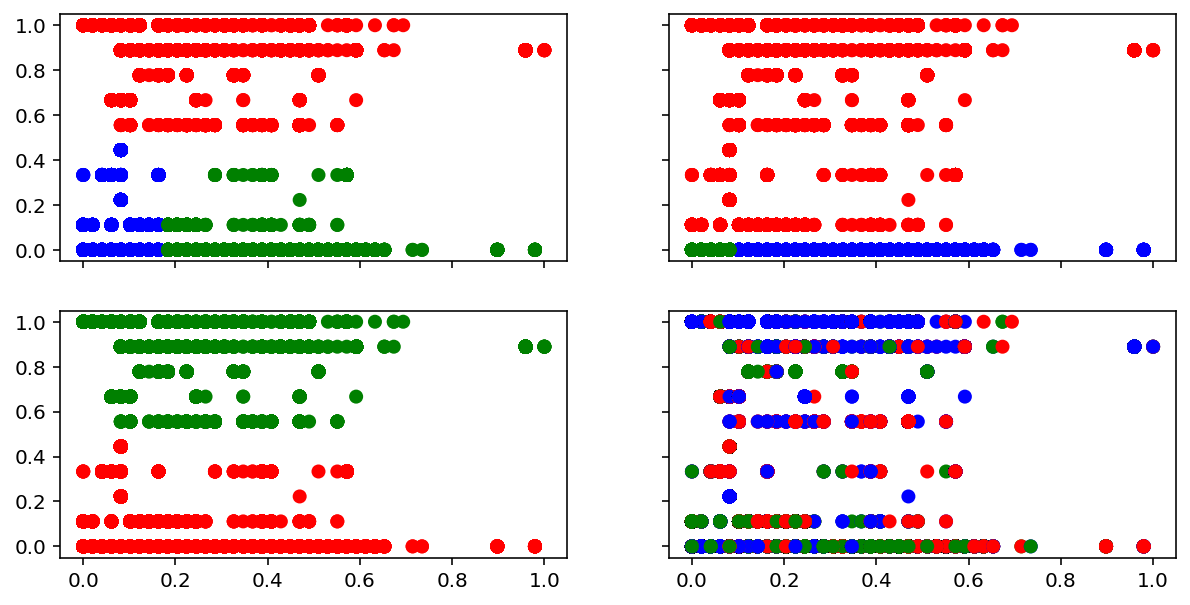

In [42]:
# plot normalized data clusters
PlotResults(np.array((data.exp_years, data.officer_assignment_key)), final_results)

In [27]:
# load unnormalized data clusters for comparison
unscaled_merged = np.loadtxt("merged_exp_key.csv", skiprows=1, delimiter=",")

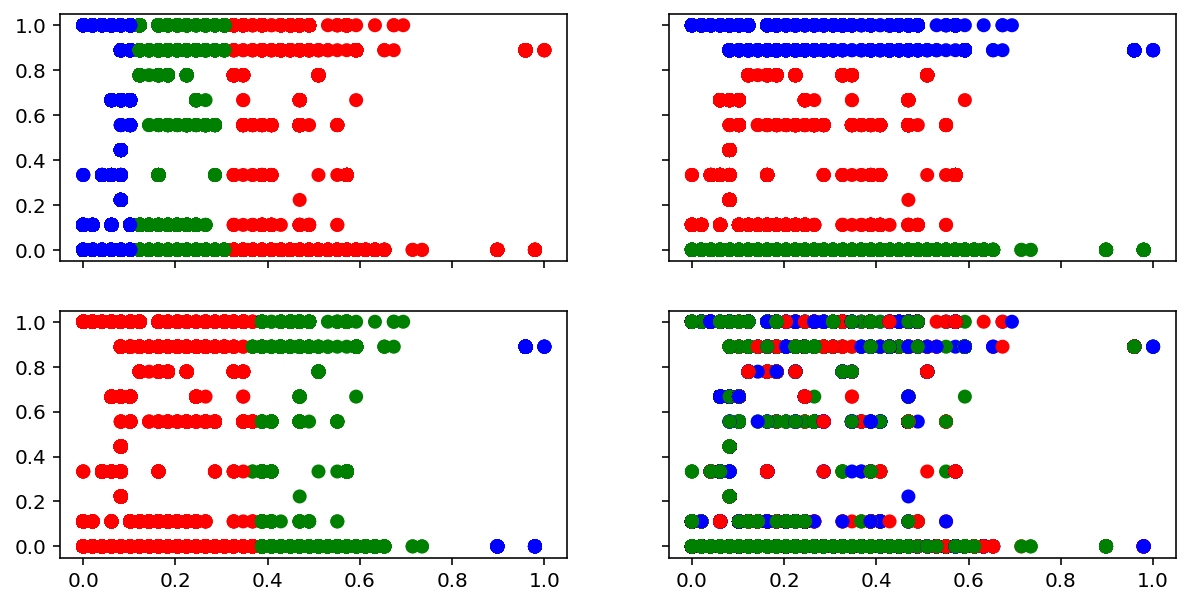

In [43]:
PlotResults(np.array((data.exp_years, data.officer_assignment_key)), unscaled_merged)

In [16]:
## uncomment to save tsne-reduced data locally
# pd.DataFrame(reduced_data).to_csv("tsne_exp_key_scaled.csv", index=False)
# pd.DataFrame(tsneResults).to_csv("tsneK_exp_key_scaled.csv", index=False)
# pd.DataFrame(final_results).to_csv("merged_exp_key_scaled.csv", index=False)